<a href="https://colab.research.google.com/github/Roubish/Cat-vs-Non-cats-Project/blob/main/cat_vs_non_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Transfer Learning (Cat vs Non-cats Project)

## About the Dataset
Dataset is located at /cat-non-cat

Dataset is in .h5 file. It is a file format that could store the data - along with its meta-data - in the form of a hierarchy. Import h5py to interact with a dataset that is stored in an H5 file. It contains

- train_catvnoncat.h5 - a training set of images labeled as cat (y=1) or non-cat (y=0)
- test_catvnoncat.h5 - a test set of images labeled as cat or non-cat
- Each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px) Now, let us load the dataset into our working session.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [5]:
# Import tensorflow
import tensorflow 
# Import SGD from tensorflow.keras.optimizers
from tensorflow.keras.optimizers import SGD   
# Import Sequential from tensorflow.keras.models    
from tensorflow.keras.models import Sequential 
# Import VGG16 from tensorflow.keras.applications
from tensorflow.keras.applications import VGG16   #VGG16 pretrained weights    
# Import Input, Dense, Dropout, GlobalAveragePooling2D from tensorflow.keras.layers
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D

In [6]:
# to make this notebook's output stable across runs
np.random.seed(42)
tensorflow.random.set_seed(42)

In [7]:
# Load the data from cat-non-cat. For that, let us first access the h5py files of the train and test sets, by using h5py.File function.

train_dataset = h5py.File('train_catvnoncat.h5', "r")

test_dataset = h5py.File('test_catvnoncat.h5', "r")

print("File format of train_dataset:",train_dataset)
print("File format of test_dataset:",test_dataset)

File format of train_dataset: <HDF5 file "train_catvnoncat.h5" (mode r)>
File format of test_dataset: <HDF5 file "test_catvnoncat.h5" (mode r)>


In [8]:
# Load training data
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

# Load test data
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

Classes are:  [b'non-cat' b'cat']
Groundtruth stored as:  1
cat


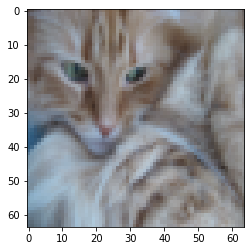

In [9]:
classes = np.array(test_dataset["list_classes"][:])

print("Classes are: ",classes)
print("Groundtruth stored as: ",train_set_y_orig[2])
print(classes[train_set_y_orig[2]].decode('utf-8'))

plt.imshow(train_set_x_orig[2])

In [10]:
# The test data contains 50 samples. Let the first 25 samples form the validation data, while the rest 25 samples form the test data.
validation_x = test_set_x_orig[:25]
validation_y = test_set_y_orig[:25]

test_set_x =test_set_x_orig[25:]
test_set_y = test_set_y_orig[25:]

In [11]:
# Print the shape of both train_set_x_orig and train_set_y_orig
print("train_set_x shape: ", train_set_x_orig.shape)
print("train_set_y shape: ", train_set_y_orig.shape)

train_set_x shape:  (209, 64, 64, 3)
train_set_y shape:  (209,)


In [13]:
# Print the shape of both validation_x and validation_y
print("Validation data size: ", validation_x.size)
print("Validation data size: ", validation_y.shape)

Validation data size:  307200
Validation data size:  (25,)


In [15]:
# Print the shape of both test_set_x and test_set_y
print("test_set_x shape: ", test_set_x.shape)
print("test_set_y shape: ", test_set_y.shape)

test_set_x shape:  (25, 64, 64, 3)
test_set_y shape:  (25,)


In [16]:
# Write the following code to get the weights of the pre-trained VGG16 model.
vgg_base = VGG16(weights='imagenet', include_top=False)
vgg_base.trainable=False

58892288/58889256 [==============================] - 0s 0us/step


In [17]:
# Create the input layer as follows.
inp = Input(shape=(64, 64, 3), name='image_input')

Since our dataset has images of shape 64 x 64 x3, we shall set the shape of the input image the same. Also, we shall give the name of the layer as image_input.

In [20]:
# Initial a sequential model:
# initiate a model
vgg_model = Sequential()

In [21]:
# Now, add the pre-trained vgg_base to the sequential model vgg_model we have initialized.
#Add the VGG base model
vgg_model.add(vgg_base)

In [22]:
# We shall now add the dense layers which we would train further:

vgg_model.add(GlobalAveragePooling2D())

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.6))

vgg_model.add(Dense(512,activation='relu'))
vgg_model.add(Dropout(0.5))

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.4))

vgg_model.add(Dense(1024,activation='relu'))
vgg_model.add(Dropout(0.3))

vgg_model.add(Dense(1, activation='sigmoid'))

In [23]:
# Instantiate SGD optimizer with learning rate lr=0.025.
sgd = SGD(lr=0.025)

In [24]:
vgg_model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [25]:
# Use fit method to train the model.
vgg_model.fit(train_set_x_orig, train_set_y_orig, epochs=10, verbose=1, validation_data=(validation_x, validation_y))

Epoch 1/10
7/7 [==============================] - 8s 127ms/step - loss: 56.7694 - accuracy: 0.5488 - val_loss: 0.9869 - val_accuracy: 0.2800
Epoch 2/10
7/7 [==============================] - 0s 21ms/step - loss: 1.1823 - accuracy: 0.5793 - val_loss: 0.3377 - val_accuracy: 0.8400
Epoch 3/10
7/7 [==============================] - 0s 20ms/step - loss: 0.7613 - accuracy: 0.6846 - val_loss: 0.3726 - val_accuracy: 0.8000
Epoch 4/10
7/7 [==============================] - 0s 20ms/step - loss: 0.4912 - accuracy: 0.7962 - val_loss: 0.5273 - val_accuracy: 0.7200
Epoch 5/10
7/7 [==============================] - 0s 21ms/step - loss: 0.4307 - accuracy: 0.8125 - val_loss: 0.2169 - val_accuracy: 0.9200
Epoch 6/10
7/7 [==============================] - 0s 20ms/step - loss: 0.3453 - accuracy: 0.8637 - val_loss: 0.2527 - val_accuracy: 0.8400
Epoch 7/10
7/7 [==============================] - 0s 20ms/step - loss: 0.3839 - accuracy: 0.8582 - val_loss: 0.2176 - val_accuracy: 0.9600
Epoch 8/10
7/7 [=========

In [26]:
# Use evaluate method on the vgg_model to get the accuracy of its performance on the test data.
vgg_model_loss, vgg_model_acc = vgg_model.evaluate(test_set_x_orig,test_set_y_orig)

2/2 [==============================] - 0s 258ms/step - loss: 0.2917 - accuracy: 0.8400


In [27]:
# Print the accuracy vgg_model_acc.
print('Test accuracy using VGG16 model as the base:', vgg_model_acc)

Test accuracy using VGG16 model as the base: 0.8399999737739563


##### Note: 
Make sure to execute these code lines in separate code cells of your notebook for better visualization experience.
- View the architectural summary of the pre-trained model(without the top dense layers), which is our vgg_base, by using vgg_base.summary() as below.

In [28]:
vgg_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [29]:
# Import plot_model from tensorflow.keras.utils.
from tensorflow.keras.utils import plot_model

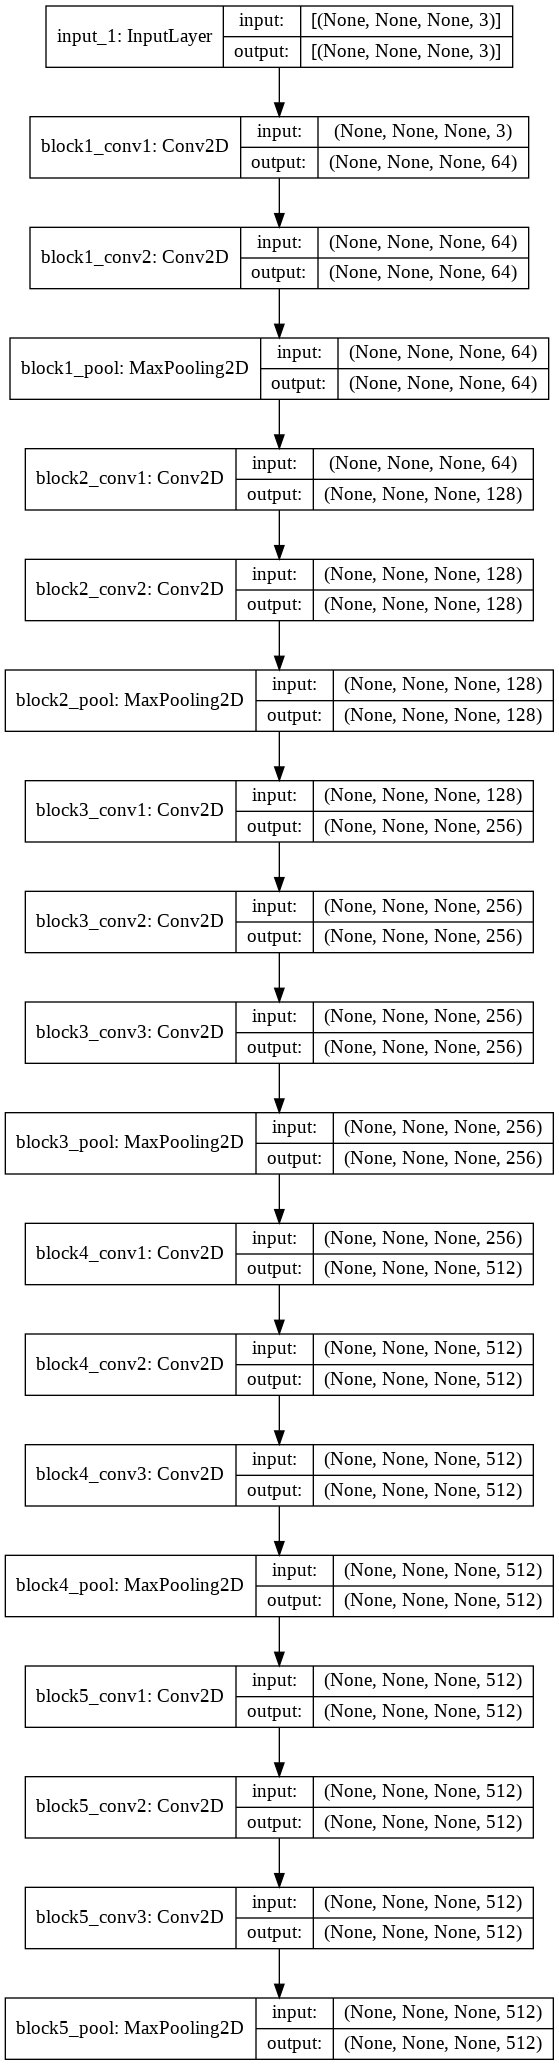

In [30]:
# Use the plot_model imported above to graphically visualize the architecture of pre-trained vgg_base.

plot_model(vgg_base, show_shapes=True, show_layer_names=True)

- Here, show_shapes=True is used to display the shape of input and output tensors for each layer in the model.

- show_layer_names=True is used to display the layer names.

Similarly, let us view the architectural summary of our custom model built on top of the pre-trained VGG model, which is our vgg_model.

In [31]:
# Use summary() on vgg_model to view its summary.
vgg_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)             

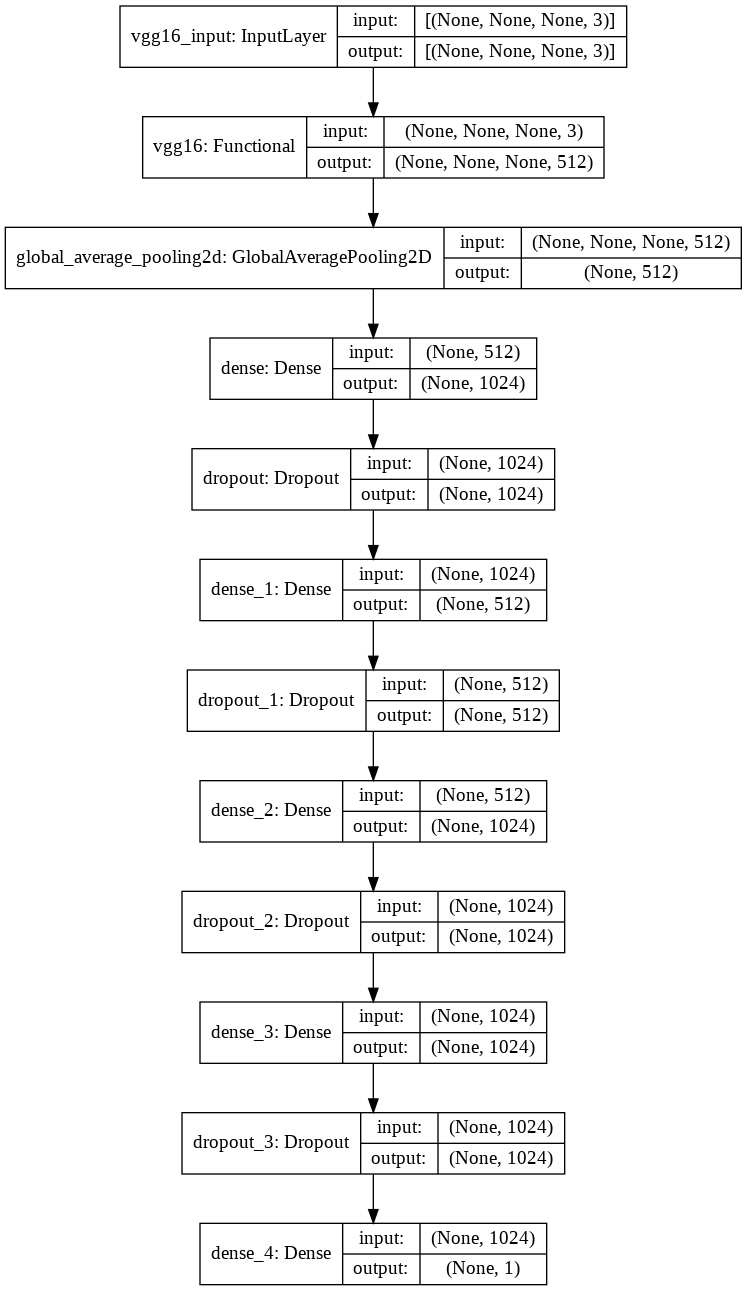

In [32]:
# Use the plot_model to graphically visualize the architecture of pre-trained vgg_model.
plot_model(vgg_model, show_shapes=True, show_layer_names=True)